In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/automobileEDA.csv")
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
X = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y = df['price']

In [4]:
# import thư viện
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2) # -> 80:20

In [6]:
# khởi tạo model
model = LinearRegression()

In [7]:
# huấn luyện model với dữ liệu Train
model.fit(X_train, y_train)

LinearRegression()

In [8]:
yhat_train = model.predict(X_train)

In [9]:
yhat_train[0:5]

array([23901.6834363 ,  8508.20470206, 19173.78829254, 17481.85579959,
       13823.87153671])

In [10]:
y_train[0:5]

66     28176.0
26      8558.0
113    17950.0
168    17669.0
63     18344.0
Name: price, dtype: float64

In [11]:
yhat_test = model.predict(X_test)

In [12]:
yhat_test[0:5]

array([ 5107.60357845, 10616.71891393, 20363.50042746, 21969.48274166,
       20673.93184249])

In [13]:
y_test[0:5]

18      6295.0
170    10698.0
107    13860.0
98     13499.0
177    15750.0
Name: price, dtype: float64

In [14]:
a = model.intercept_

In [15]:
b = model.coef_

In [16]:
a

-14299.649780347776

In [17]:
b

array([ 19.73015339,   5.96227526,  83.81260715, -16.05339225])

price = -14299.649780347776 + 19.73015339 x horsepower + 5.96227526 x curb-weight + 83.81260715 x engine-size - 16.05339225 x highway-mpg

In [18]:
# tính R^2
print('Full Dataset R-square:', model.score(X, y))
print('Train Dataset R-square:', model.score(X_train, y_train))
print('Test Dataset R-square:', model.score(X_test, y_test))

Full Dataset R-square: 0.801226749645378
Train Dataset R-square: 0.8103273093438823
Test Dataset R-square: 0.769327902438468


In [19]:
# tính MSE, MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [20]:
print('Train Dataset MSE:', mean_squared_error(y_train, yhat_train))
print('Test Dataset MSE:', mean_squared_error(y_test, yhat_test))

Train Dataset MSE: 11213359.20451133
Test Dataset MSE: 17478092.155830655


In [21]:
print('Train Dataset MAE:', mean_absolute_error(y_train, yhat_train))
print('Test Dataset MAE:', mean_absolute_error(y_test, yhat_test))

Train Dataset MAE: 2395.170726604544
Test Dataset MAE: 2694.85067188769


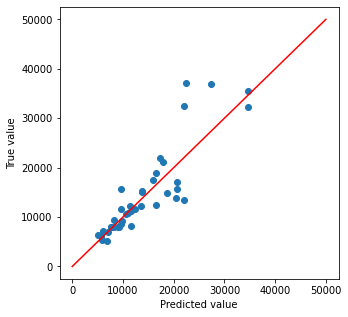

In [22]:
# trực quan hóa kết quả
plt.figure(figsize=(5,5))
plt.scatter(yhat_test, y_test)
plt.xlabel('Predicted value')
plt.ylabel('True value')
plt.plot([0, 50000], [0, 50000], 'k-', color='r')
plt.show()

c:\program files\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\program files\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\program files\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `k

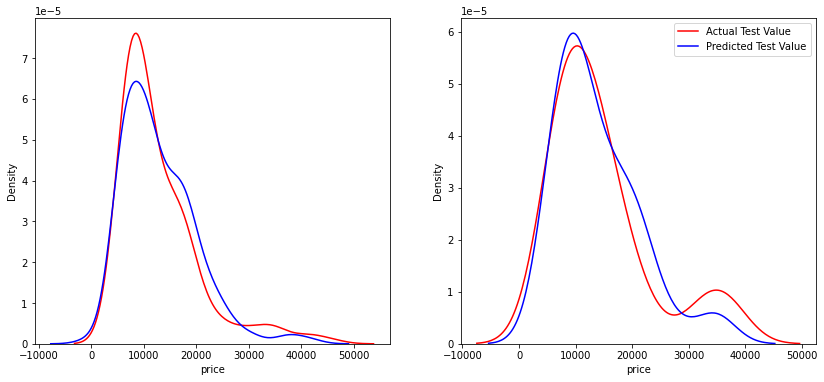

In [24]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax1 = sns.distplot(y_train, hist=False, color='r', label='Actual Train Value')
sns.distplot(yhat_train, hist=False, color='b', label='Predicted Train Value', ax=ax1)
plt.subplot(1,2,2)
ax2 = sns.distplot(y_test, hist=False, color='r', label='Actual Test Value')
sns.distplot(yhat_test, hist=False, color='b', label='Predicted Test Value', ax=ax2)
plt.legend()
plt.show()

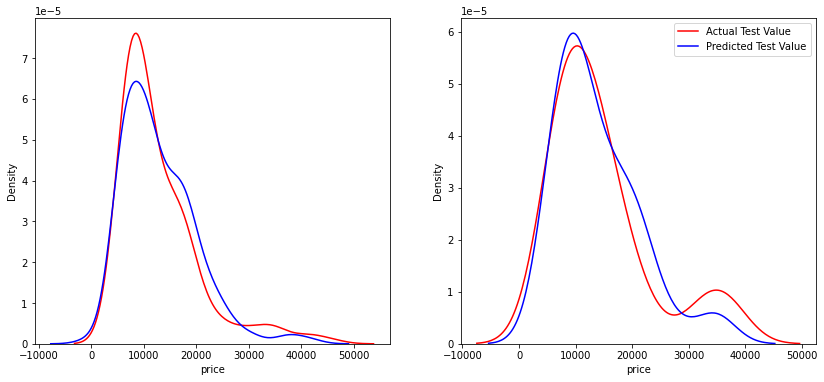

In [26]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax1 = sns.kdeplot(y_train, color='r', label='Actual Train Value')
sns.kdeplot(yhat_train, color='b', label='Predicted Train Value', ax=ax1)
plt.subplot(1,2,2)
ax2 = sns.kdeplot(y_test, color='r', label='Actual Test Value')
sns.kdeplot(yhat_test, color='b', label='Predicted Test Value', ax=ax2)
plt.legend()
plt.show()

In [27]:
## Dự đoán dữ liệu mới
X_new = pd.DataFrame({'horsepower': [115],
                     'curb-weight': [2824],
                     'engine-size': [135],
                     'highway-mpg': [23]})

In [28]:
yhat_new = model.predict(X_new)

In [29]:
yhat_new

array([15752.25714843])